**Ethan Seal and Cole Turner**

Fall 2019

CS343: Neural Networks

Project 3: Convolutional Neural Networks

In [106]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1: 2D Convolution

As the name suggests, a critical component of a convolution neural network is the convolution operation. We're going to start by implementing a function in `filter_ops.py` that convolves an image with a filter. We will make use of this function when we built the convolutional net. We'll make several versions of the function to help with the debugging, gradually adding complexity.

First, implement `conv2_gray` according to the specifications in the comments. Run the following code to test your implementation

### a. Grayscale image with a multiple filters

In [107]:
from filter_ops import conv2_gray
import scipy.signal as sp
from PIL import Image

#### Test: Single kernel, odd image size

In [108]:
# Create test 'staircase' pattern 0-10 across the column dimension and replicate across rows
test_num_cols = 7
test_img = np.tile(1 + np.arange(0, test_num_cols), (test_num_cols, 1))

# Single uniform (normalized) averaging kernel
test_ker_sz = 2
test_ker = np.ones([1, test_ker_sz, test_ker_sz])
test_ker /= test_ker.sum()
print(f'test img shape is {test_img.shape} and test ker shape is {test_ker.shape}')
print(f'test img looks like:\n{test_img}\nand test ker looks like\n{test_ker}')

test img shape is (7, 7) and test ker shape is (1, 2, 2)
test img looks like:
[[1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]]
and test ker looks like
[[[0.25 0.25]
  [0.25 0.25]]]


In [109]:
test_out_img = conv2_gray(test_img, test_ker, verbose=True)
print(f'Your filtered image shape is {test_out_img.shape} and it should be (1, 7, 7)')
print(f'Here is your filtered image:')
print('------------------------------------')
print(test_out_img[0])
print('------------------------------------')
print(f'Here is what it should look like:')
print('------------------------------------')
print(sp.convolve2d(test_img, test_ker[0], mode='same'))
print('------------------------------------')

[[[0.25 0.75 1.25 1.75 2.25 2.75 3.25]
  [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
  [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
  [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
  [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
  [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
  [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]]]
Your filtered image shape is (1, 7, 7) and it should be (1, 7, 7)
Here is your filtered image:
------------------------------------
[[0.25 0.75 1.25 1.75 2.25 2.75 3.25]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]]
------------------------------------
Here is what it should look like:
------------------------------------
[[0.25 0.75 1.25 1.75 2.25 2.75 3.25]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5

#### Test: Single kernel, even image size

In [110]:
# Create test 'staircase' pattern 0-10 across the column dimension and replicate across rows
test_num_cols = 8
test_img = np.tile(1 + np.arange(0, test_num_cols), (test_num_cols, 1))
print(f'test img shape is {test_img.shape} and test ker shape is {test_ker.shape}')
print(f'test img looks like:\n{test_img}\nand test ker looks like\n{test_ker}')

test img shape is (8, 8) and test ker shape is (1, 2, 2)
test img looks like:
[[1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]]
and test ker looks like
[[[0.25 0.25]
  [0.25 0.25]]]


In [111]:
test_out_img = conv2_gray(test_img, test_ker, verbose=True)
print(f'Your filtered image shape is {test_out_img.shape} and it should be (1, 8, 8)')
print(f'Here is your filtered image:')
print('------------------------------------')
print(test_out_img[0])
print('------------------------------------')
print(f'Here is what it should look like:')
print('------------------------------------')
print(sp.convolve2d(test_img, test_ker[0], mode='same'))
print('------------------------------------')

[[[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75]
  [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
  [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
  [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
  [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
  [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
  [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
  [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]]]
Your filtered image shape is (1, 8, 8) and it should be (1, 8, 8)
Here is your filtered image:
------------------------------------
[[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]]
------------------------------------
Here is what it should look like:
------------------------------------
[[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75]
 [0.5  1.5  2.5  3

#### Test: Single kernel (odd shape), even image size

In [112]:
# Create test 'staircase' pattern 0-10 across the column dimension and replicate across rows
test_num_cols = 8
test_img = np.tile(1 + np.arange(0, test_num_cols), (test_num_cols+2, 1))

test_ker2_sz = 5
test_ker2 = np.ones([1, test_ker2_sz, test_ker2_sz])
test_ker2 /= test_ker2.sum()
print(f'test img shape is {test_img.shape} and test ker shape is {test_ker2.shape}')
print(f'test img looks like:\n{test_img}\nand test ker looks like\n{test_ker2}')

test img shape is (10, 8) and test ker shape is (1, 5, 5)
test img looks like:
[[1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]]
and test ker looks like
[[[0.04 0.04 0.04 0.04 0.04]
  [0.04 0.04 0.04 0.04 0.04]
  [0.04 0.04 0.04 0.04 0.04]
  [0.04 0.04 0.04 0.04 0.04]
  [0.04 0.04 0.04 0.04 0.04]]]


In [113]:
test_out_img = conv2_gray(test_img, test_ker2, verbose=True)
print(f'Your filtered image shape is {test_out_img.shape} and it should be (1, 10, 8)')
print(f'Here is your filtered image:')
print('------------------------------------')
print(test_out_img[0])
print('------------------------------------')
print(f'Here is what it should look like:')
print('------------------------------------')
print(sp.convolve2d(test_img, test_ker2[0], mode='same'))
print('------------------------------------')

[[[0.72 1.2  1.8  2.4  3.   3.6  3.12 2.52]
  [0.96 1.6  2.4  3.2  4.   4.8  4.16 3.36]
  [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
  [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
  [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
  [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
  [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
  [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
  [0.96 1.6  2.4  3.2  4.   4.8  4.16 3.36]
  [0.72 1.2  1.8  2.4  3.   3.6  3.12 2.52]]]
Your filtered image shape is (1, 10, 8) and it should be (1, 10, 8)
Here is your filtered image:
------------------------------------
[[0.72 1.2  1.8  2.4  3.   3.6  3.12 2.52]
 [0.96 1.6  2.4  3.2  4.   4.8  4.16 3.36]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [0.96 1.6  2.4  3.2  4.   4.8  4.16 3.36]
 [0.72 1.2  1.8  2.4  3.   3.6  3.12 

#### Test: Actual grayscale image with multiple filters

Now you're ready to test your convolution function on an actual image!

Download the image of the clown fish from the project website (`clownfish.png`). Put it in a folder called `images/` in your project working directory

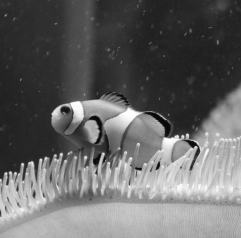

In [114]:
# Load in the clownfish image then convert to grayscale for testing
clownfish = Image.open('images/clownfish.png', 'r')
clownfish_gray = clownfish.convert('L')  # convert to grayscale
clownfish_gray

Define Gabor filters to test out the convolution. Gabor filters are a broad class of kernels, and the following function generates those that approximate the receptive field of certain neurons (**simple cells**) in an area of the brain called primary visual cortex (V1). The equation comes from an analysis of the neurophysiological data by Lee (1996): 

http://leelab.cnbc.cmu.edu/publication/assets/links/ImageRepre.pdf

In [115]:
def gabor(filter_sz_xy, w, theta, K=np.pi):
    ''' Generates a simple cell-like Gabor filter.
    
    Parameters:
    -----------
    filter_sz_xy: tuple. shape=(filter width, filter height)
    w: float. spatial frequency of the filter
    theta: float. Angular direction of the filter in radians
    K: float. Angular phase of the filter in radians
    '''
    rad_x, rad_y = filter_sz_xy
    rad_x, rad_y = int(rad_x/2), int(rad_y/2)
    [x, y] = np.meshgrid(np.arange(-rad_x, rad_x+1), np.arange(-rad_y, rad_y+1))

    x_p = x*np.cos(theta) + y*np.sin(theta)
    y_p = -x*np.sin(theta) + y*np.cos(theta)
    
    # Take the real part of the filter
    gauss = w**2 / (4*np.pi*K**2) * np.exp(-(w**2/(8*K**2)) * (4*x_p**2 + y_p**2))
    sinusoid = np.cos(w*x_p) * np.exp(K**2/2)
    gabor = gauss * sinusoid
    return gabor


def plot_image_panel(imgs):
    fig, axes = plt.subplots(ncols=len(imgs), figsize=(3*len(imgs),6))
    if len(imgs) == 1:
        axes.imshow(imgs[0])
        axes.set_xticks([])
        axes.set_yticks([])
    else:
        for ax, img in zip(axes, imgs):
            ax.imshow(img)
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

Plot some Simple cell like Gabor filters

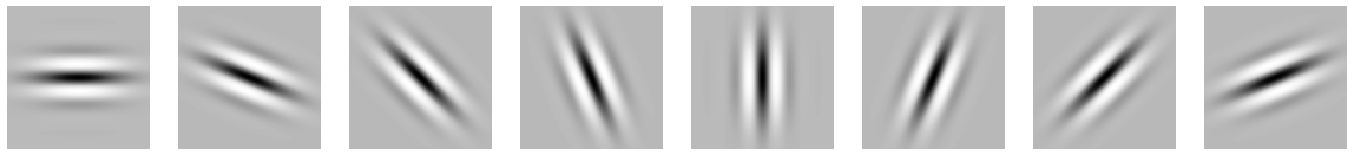

In [116]:
gabor_kers = []
for th in np.arange(-np.pi/2, np.pi/2, np.pi/8):
    gabor_kers.append(gabor(filter_sz_xy=[121, 121], w=0.25, theta=th))
plot_image_panel(gabor_kers)

These filters look nice, but their 121x121 size adds needless computation time (especially just to test your convolution function!).

**TODO:** Write code below that generates 4 Gabor filters that differ span $90^{\circ}$ and $45^{\circ}$ directions with spatial frequency 2 and filter size (21,21). Convert the list to a numpy array (shape = (4, 21, 21)).

Note: the `gabor` function assumes the angles are in radians, not degrees

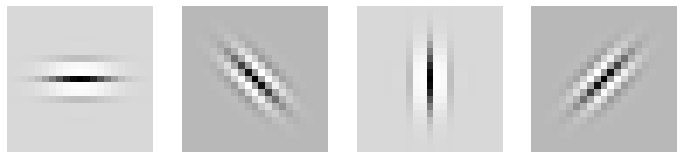

Test kernels have shape (4, 21, 21) and it should be (4, 21, 21)


In [117]:
# Add your code to make the 4 Gabor filters here. Leave the following code to plot them
# convert to ndarray, and print out the expected shape.

gabor_kers = []
for th in np.arange(-np.pi/2, np.pi/2, np.pi/4):
    gabor_kers.append(gabor(filter_sz_xy=[21, 21], w=2, theta=th))

gabor_kers = np.asarray(gabor_kers)
plot_image_panel(gabor_kers)
gabor_kers = np.array(gabor_kers)

print(f'Test kernels have shape {gabor_kers.shape} and it should be (4, 21, 21)')

The following code should produce two images that look like the clown fish but on a gray background.

**Question 1:** What is each filter picking up in the image? How does each filter relate the the receptive fields of V1 neurons?

[[[ 485.303  585.365  670.119 ...  534.201  466.772  386.496]
  [ 153.824  185.969  212.888 ...  166.708  139.309  111.233]
  [-169.339 -199.479 -223.216 ...  -64.792  -62.209  -55.806]
  ...
  [-368.131 -452.178 -527.018 ... -530.876 -457.998 -375.047]
  [ 592.321  721.853  834.852 ...  785.777  686.904  569.051]
  [1709.004 2080.628 2404.053 ... 2324.136 2022.904 1668.871]]

 [[ 220.44   104.446  -32.895 ...   87.884   72.774  -54.714]
  [ 111.137  194.814   88.141 ...   38.781   95.392   69.587]
  [  41.568  106.11   143.528 ...  -15.865   46.77    77.419]
  ...
  [ 311.647  222.159  213.979 ...  565.034  380.645  -18.121]
  [ 296.282  352.212  207.467 ...  382.66   718.595  408.677]
  [-256.462  298.501  293.32  ...   -4.717  402.581  780.275]]

 [[ 497.406  167.874 -110.358 ...  -79.052  111.051  391.407]
  [ 598.282  204.836 -128.026 ...  -97.186  131.167  478.272]
  [ 681.929  235.694 -140.167 ... -112.075  146.562  554.009]
  ...
  [2282.488  826.357 -519.349 ... -629.504  894.

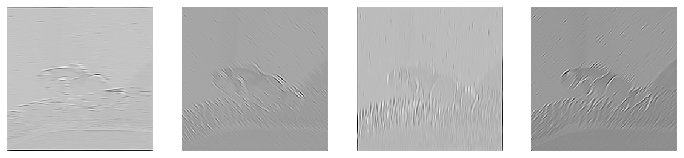

In [118]:
clownfish_gray_np = np.array(clownfish_gray)
clownfish_gray_out = conv2_gray(clownfish_gray_np, gabor_kers)
print(f'Your filtered clown fish shape is {clownfish_gray_out.shape} and it should be (4, 238, 241)')
plot_image_panel(clownfish_gray_out)

### b. Images with RGB color channels

Once you have your grayscale convolution working, copy-and-paste your code into the more general function `conv2`.

The difference with this new function is that the `img` input has a leading dimension for color channel. For example, (3, 200, 200) for a color image and (1, 200, 200) for grayscale. 

It shouldn't take a great deal of work to modify your `conv2_gray` code for this new case. See the function header for some hints.

In [119]:
from filter_ops import conv2

#### Test: Simple box filter

Raw color clown fish image is (3, 238, 241) and should be (3, 238, 241)


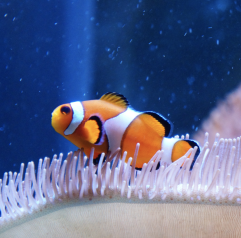

In [120]:
clownfish_np = np.array(clownfish)
clownfish_np = clownfish_np[:,:, :3]  # strip out alpha channel so its just RGB
clownfish_np = np.transpose(clownfish_np, (2, 0, 1))  # permute dims so that channel is leading
print(f'Raw color clown fish image is {clownfish_np.shape} and should be (3, 238, 241)')
clownfish

- **TODO:** Make a 11x11 box filter, with constant, identical positive values normalized so that the entire filter sums to 1.
- **TODO:** Add a leading singleton dimension so shape is (1, 11, 11)

In [121]:
# Add your code for the above TODOs here...

box_ker = np.ones((1,11,11))/121
print(f'Test kernels shape is {box_ker.shape} and should be (1, 11, 11)')
print(f'box ker looks like\n{box_ker}')

Test kernels shape is (1, 11, 11) and should be (1, 11, 11)
box ker looks like
[[[0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]]]


In [141]:
clownfish_out = conv2(clownfish_np, box_ker)
print(f'Your filtered clown fish shape is {clownfish_out.shape} and it should be (1, 3, 238, 241)')

[[[[ 56.008  64.917  74.554 ...  62.149  54.57   46.281]
   [ 65.364  75.769  86.851 ...  72.686  63.893  54.331]
   [ 74.289  86.14   98.645 ...  83.719  73.736  62.934]
   ...
   [197.488 231.884 266.57  ... 261.438 230.347 197.306]
   [174.017 204.397 234.95  ... 227.818 200.893 171.975]
   [150.702 176.86  203.14  ... 194.463 171.471 146.727]]

  [[ 56.008  64.917  74.554 ...  62.149  54.57   46.281]
   [ 65.364  75.769  86.851 ...  72.686  63.893  54.331]
   [ 74.289  86.14   98.645 ...  83.719  73.736  62.934]
   ...
   [197.488 231.884 266.57  ... 261.438 230.347 197.306]
   [174.017 204.397 234.95  ... 227.818 200.893 171.975]
   [150.702 176.86  203.14  ... 194.463 171.471 146.727]]

  [[ 56.008  64.917  74.554 ...  62.149  54.57   46.281]
   [ 65.364  75.769  86.851 ...  72.686  63.893  54.331]
   [ 74.289  86.14   98.645 ...  83.719  73.736  62.934]
   ...
   [197.488 231.884 266.57  ... 261.438 230.347 197.306]
   [174.017 204.397 234.95  ... 227.818 200.893 171.975]
   [15

**TODO**: Visualize output of RGB box filter convolution of clownfish image. In the cell below:

- Convert the convolution output to uint8.
- Permute the dimensions for visualization so that they are: `n_kers, img_y, img_x, n_chans` = (1, 238, 241, 3).
- Visualize using the `plot_image_panel` function, defined above.

If all goes well, you should see a blurrier version of the input image (seemingly smaller because of the way we're plotting it, but the colors should look right).

(1, 3, 238, 241)
(1, 238, 241, 3)


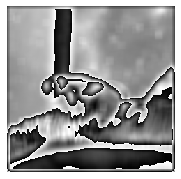

In [145]:
print(clownfish_out.shape)
clownfish_out = clownfish_out.astype(np.uint8)
clownfish_out = np.transpose(clownfish_out, (0, 2, 3, 1))
print(clownfish_out.shape)
plot_image_panel(clownfish_out)


**Question 2:** Do you notice anything else (other than the blurriness) that is different about this filtered image compared to the original?

#### Test: Gabor filters

Finally, we'll test your color convolution function with the gabor filters

In [124]:
clownfish_out = conv2(clownfish_np, gabor_kers)
print(f'Your filtered clown fish shape is {clownfish_out.shape} and it should be (4, 3, 238, 241)')

[[[[ 1862.921  2249.629  2577.6   ...  2077.83   1813.456  1500.446]
   [  562.18    682.039   783.606 ...   697.387   588.644   473.684]
   [ -597.822  -709.561  -800.067 ...  -289.928  -277.253  -248.316]
   ...
   [-1127.883 -1383.236 -1609.895 ... -1586.15  -1368.743 -1120.6  ]
   [ 1777.608  2169.59   2513.679 ...  2344.262  2050.21   1699.316]
   [ 5185.871  6308.981  7283.646 ...  6898.202  6001.945  4949.304]]

  [[ 1862.921  2249.629  2577.6   ...  2077.83   1813.456  1500.446]
   [  562.18    682.039   783.606 ...   697.387   588.644   473.684]
   [ -597.822  -709.561  -800.067 ...  -289.928  -277.253  -248.316]
   ...
   [-1127.883 -1383.236 -1609.895 ... -1586.15  -1368.743 -1120.6  ]
   [ 1777.608  2169.59   2513.679 ...  2344.262  2050.21   1699.316]
   [ 5185.871  6308.981  7283.646 ...  6898.202  6001.945  4949.304]]

  [[ 1862.921  2249.629  2577.6   ...  2077.83   1813.456  1500.446]
   [  562.18    682.039   783.606 ...   697.387   588.644   473.684]
   [ -597.822  -

**TODO**: Visualize output of RGB Gabor filter convolution of clownfish image. In the cell below:

- Normalize the convolution output based on the **dynamic range** of the image (the "CS251 way"). Do this normalization within each RGB channel independently. Using `keepdims` might be useful here too.
- Scale the output to the range 0-255 within each color channel — i.e. the max of each RGB channel should be (255, 255, 255) for (R, G, B). 
- Permute the dimensions for visualization so that they are: `n_kers, img_y, img_x, n_chans`. The ultimate shape after your operations is `(4, 238, 241, 3)`
- Convert the output to uint8.
- Visualize using the `plot_image_panel` function, defined above.

If everything goes well, you should see a similar pattern as in your grayscale filtered images, but now with watercolor/stained glass-like psychedelic colors!

### c. Neural net convolution

Now you're ready to implement the convolution function that we'll use in our convolutional neural network. Copy-and-paste your `conv2` code into `conv2nn` within `filter_ops.py` and make the modifications specified in the docstring.

In [125]:
from filter_ops import conv2nn

#### Test: Multiple images and Gabor filters

This test is simply to pass two copies of the clown fish image to `conv2nn`. The corresponding filtered images should look identical

In [126]:
imgs = np.stack([clownfish_np, clownfish_np])
bias = np.zeros(len(gabor_kers))
print(f'Test img shape is {imgs.shape}')

Test img shape is (2, 3, 238, 241)


In [127]:
# Make a new axis for color channel and replicate the Gabors across that channel so that each RGB channel
# is filtered by the same filters
gabor_kers_chans = np.tile(gabor_kers[:, np.newaxis, :, :], (3, 1, 1, ))
print(f'Test gabor filter shape is {gabor_kers_chans.shape}')

Test gabor filter shape is (4, 3, 21, 21)


In [128]:
clownfish_imgs_out = conv2nn(imgs, gabor_kers_chans, bias)
print(f'Your filtered clown fish shape is {clownfish_imgs_out.shape} and it should be (2, 4, 238, 241)')
if np.all(clownfish_imgs_out[0] == clownfish_imgs_out[1]):
    print('Your filter maps are identical as expected!')
else:
    print('Your filter maps are not the same :(')

plot_image_panel(clownfish_imgs_out[0])

AttributeError: 'NoneType' object has no attribute 'shape'

#### Test: Multiple images and Gabor filters with a different bias term

In [ ]:
bias = 10*np.ones(len(gabor_kers_chans))
clownfish_imgs_out = conv2nn(imgs, gabor_kers_chans, bias)
print(f'Your filtered clown fish shape is {clownfish_imgs_out.shape} and it should be (2, 4, 238, 241)')
if np.all(clownfish_imgs_out[0] == clownfish_imgs_out[1]):
    print('Your filter maps are identical as expected!')
else:
    print('Your filter maps are not the same :(')
print(f'(bias test) The minimum value in your filtered images is {clownfish_imgs_out.min():.2f} and it should be -6560.38')

## Task 2: 2D max pooling

We took care to preserve the spatial dimensions of the input image in our convolution operation. Convolutional networks often have a 'pyramid' shape, where the spatial dimensions reduce in size as you go deeper up the net. This is usually achieved with a pooling operation (usually max, like you will implement here, or mean), which complements the convolution. Convolution and pooling operations are often interdigitated layer-to-layer.

We will implement this function in two stages to help with the debugging.

### a. In `filter_ops.py` implement the `max_pool` function, then run the following test code.

In [ ]:
from filter_ops import max_pool

#### Testing: Even checkerboard

In [ ]:
# Create simple checkerboard pattern for testing.
# NOTE: We're creating an extra singleton dimension 
grid = np.tile(np.stack([np.array([1, 0]*5), np.array([0, 0]*5)]), (3, 1))
print(f'Image shape is {grid.shape}')
print(f'The checkerboard image looks like\n{grid}')

In [ ]:
grid_pooled = max_pool(grid)
print(f'Pooled image shape is {grid_pooled.shape} and it should be (5, 9)')
print(f'Here is your max filtered checkerboard. It should contain all ones:\n{grid_pooled}')

Testing stride:

In [ ]:
grid_pooled = max_pool(grid, strides=2)
print(f'Pooled image shape is {grid_pooled.shape} and it should be (3, 5)')
print(f'Here is your max filtered checkerboard. It should contain all ones:\n{grid_pooled}')

#### Testing: Odd checkerboard

In [ ]:
# Create simple checkerboard pattern for testing
grid_odd = np.tile(np.stack([np.array([1, 0]*2), np.array([0, 0]*2), np.array([1, 0]*2)]), (3, 1))
print(f'Image shape is {grid_odd.shape}')
print(f'The odd checkerboard image looks like\n{grid_odd}')

In [ ]:
grid_pooled = max_pool(grid_odd)
print(f'Pooled image shape is {grid_pooled.shape} and it should be (8, 3)')
print('Here is your max filtered checkerboard. It should contain all ones:')
print(f'Here is your odd max filtered checkerboard. It should contain all ones:\n{grid_pooled}')

Testing stride:

In [ ]:
grid_pooled = max_pool(grid_odd, strides=2)
print(f'Pooled image shape is {grid_pooled.shape} and it should be (4, 2)')
print(f'Here is your max filtered checkerboard. It should contain all ones:\n{grid_pooled}')

#### Testing: bars

In [ ]:
# Create simple bar pattern for testing
bars = np.tile(np.stack([np.array([1]*10), np.array([0]*10), np.array([0]*10), np.array([0]*10)]), (3, 1))
print(f'Image shape is {bars.shape}')
print(f'Here are your bar inputs:\n{bars}')

In [ ]:
bars_pooled = max_pool(bars)
print(f'Pooled image shape is {bars_pooled.shape} and it should be (11, 9)')
print(f'Here are your max filtered bars:\n{bars_pooled}')

Here is what it should look like:

    [[1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Testing stride of 2:

In [ ]:
bars_pooled = max_pool(bars, strides=2)
print(f'Pooled image shape is {bars_pooled.shape} and it should be (6, 5)')
print(f'Here are your max filtered bars:\n{bars_pooled}')

Here is what it should look like:

    [[1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]]

Testing stride of 3:

In [ ]:
bars_pooled = max_pool(bars, strides=3)
print(f'Pooled image shape is {bars_pooled.shape} and it should be (4, 3)')
print(f'Here are your max filtered bars:\n{bars_pooled}')

Here is what it should look like:

    [[1. 1. 1.]
     [1. 1. 1.]
     [0. 0. 0.]
     [0. 0. 0.]]

Testing pooling size of 3:

In [ ]:
bars_pooled = max_pool(bars, pool_size=3)
print(f'Pooled image shape is {bars_pooled.shape} and it should be (10, 8)')
print(f'Here are your max filtered bars:\n{bars_pooled}')

Here is what it should look like:

    [[1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0.]]

### b. Implement `max_poolnn`

We will add mini-batch and color channel support to your `max_pool` function. Copy-and-paste your code into `max_poolnn` to get started. Check your implementation with the following test code.

In [ ]:
from filter_ops import max_poolnn

#### Test: Simple bars

Testing pooling size of 2 and stride 2

In [ ]:
# Create simple bar pattern for testing
bars_batch = np.tile(np.stack([np.array([1]*10), np.array([0]*10), np.array([0]*10), np.array([0]*10)]), (1, 1, 3, 1))
print(f'Image shape is {bars_batch.shape}')
print(f'Here are your bar inputs:\n{bars_batch[0,0]}')

In [ ]:
bars_batch_pooled = max_poolnn(bars_batch, strides=2, pool_size=2)
print(f'Pooled image shape is {bars_batch_pooled.shape} and it should be (1, 1, 6, 5)')
print(f'Here are your max filtered bars:\n{bars_batch_pooled[0,0]}')

Here is what it should look like:

    [[1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]]

#### Test on real image

In [ ]:
# Load in the clownfish image then convert to grayscale for testing
clownfish = Image.open('images/clownfish.png', 'r')
clownfish_np = np.array(clownfish)
clownfish_np = clownfish_np[:,:, :3]  # strip out alpha channel so its just RGB
clownfish_np = np.transpose(clownfish_np, (2, 0, 1))  # permute dims so that channel is leading
clownfish_np = clownfish_np[np.newaxis, :, :, :]  # add dummy batch dimension
print(f'Shape of clownfish image is {clownfish_np.shape}')
clownfish

In [ ]:
img_pooled = max_poolnn(clownfish_np, pool_size=8)
print(f'Pooled image shape is {img_pooled.shape} and it should be (1, 3, 231, 234)')

**TODO**: Visualize output of max pooling of clownfish image. In the cell below:

- Permute the dimensions of `img_pooled` so that it is `batch, img_y, img_x, n_chans` = (1, 231, 234, 3).
- Convert the output to uint8.
- Visualize using the `plot_image_panel` function, defined above.

If everything goes well, it should look like a blocky version of the original image (with color).